# Topic 1  Overview of Machine Learning and Scikit Learn

In [0]:
import sklearn

# Topic 2 Classification

## Step 1: Prepare the Data

### Import Data

In [0]:
# Load Iris dataset
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv"
# dataset_path = 'data/iris.csv'
                     
X = pd.read_csv(dataset_path)
X

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Split the Features and Target

In [0]:
y = X.pop('Name')
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object

In [0]:
X.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Split and Randomize Training and Testing Dataset

In [0]:
# Split and Randomize the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,
                                                 test_size=0.3,
                                                 random_state=0)
# random_state: ensure reproducibility

In [0]:
# x_train = X.sample(frac = 0.7, random_state = 0)
# x_test = X.drop(index = x_train.index)

### Scale/Normalize the Features

In [0]:
# Scale the input data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 2 Define the Model

In [0]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

## Step 3 Train the Model

In [0]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Step 4 Evaluate the Model

In [0]:
# Acurracy score
clf.score(X_test,y_test)

0.9777777777777777

In [0]:
y_pred = clf.predict(X_test)
# y_pred

In [0]:
# y_test

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9777777777777777

In [0]:
# le.inverse_transform(y_test)

In [0]:
# pd.DataFrame({
#     'Prediction': y_pred,
#     'Actual': y_test
# })

## Step 5 Save the Model

In [0]:
from sklearn.externals import joblib
joblib.dump(clf, 'iris.pkl') 

['iris.pkl']

## Step 6 Load the Model for Inference

In [0]:
from sklearn.externals import joblib
clf2 = joblib.load('iris.pkl')

In [0]:
X_new = [[7, 3, 5, 2]]
y = clf2.predict(X_new)
y

array(['Iris-virginica'], dtype=object)

### How decision tree determine which feature to use (Optional)

In [0]:
# df = pd.read_csv(dataset_path)
# df

In [0]:
# import seaborn as sns

In [0]:
# sns.catplot(x = 'Name', y = 'PetalWidth', data = df, kind = 'box')

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9777777777777777

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9777777777777777

## Ex: Classifiers

In [0]:
# Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8888888888888888

In [0]:
# SVM Classifier

from sklearn.svm import SVC 
clf = SVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9777777777777777

In [0]:
# Guassian Navie Bayes Classifer

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

1.0

In [0]:
# Decision Tree Classifer

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9777777777777777

In [0]:
# SGD Classifer

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7333333333333333

In [0]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
tree_clf.score(X_test,y_test),  tree_clf.score(X_train,y_train)

(0.9777777777777777, 1.0)

In [0]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train,y_train)
tree_clf.score(X_test,y_test),  tree_clf.score(X_train,y_train)

(0.9777777777777777, 0.9809523809523809)

### Tree Visualization (Optional)

In [0]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(tree_clf, out_file = None,
                                feature_names = X.columns,
                                filled = False, rounded = True)
graph = graphviz.Source(dot_data, format="png")
graph.render('tree')

'tree.png'

In [0]:
# from sklearn import tree
# dot_data = tree.export_graphviz(tree_clf, out_file='tree',
#                                 feature_names = X.columns,
#                                 filled = False, rounded = True)

## Ensemble Methods

### Bagging

In [0]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9777777777777777

In [0]:
clf.feature_importances_

array([0.08720353, 0.02478258, 0.47189685, 0.41611703])

In [0]:
importances = pd.DataFrame(data = 
                    {
                      'feature_name': X.columns,
                      'feature_importance': clf.feature_importances_
                    }
                  )
importances.sort_values(['feature_importance'], ascending = False)

,feature_name,feature_importance
2,PetalLength,0.471897
3,PetalWidth,0.416117
0,SepalLength,0.087204
1,SepalWidth,0.024783


### Boosting

In [0]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9777777777777777

### Stacking

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

clf1 = LogisticRegression()
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

clf = VotingClassifier(estimators=[('lr', clf1), 
                                   ('rf', clf2), 
                                   ('gnb', clf3)], 
                       voting='soft')

clf.fit(X_train,y_train)
clf.score(X_test,y_test)

# hard -> vote based on final prediction
# soft -> vote based on sum of prob

0.9777777777777777

## Ex: Emsemble Methods

In [0]:
# Load dataset
import pandas as pd
dataset_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
# dataset_path = "data/winequality.csv"
X = pd.read_csv(dataset_path, sep=';')
X.head()

In [0]:
X['quality'].value_counts()

In [0]:
y = X.pop('quality')
# y

In [0]:
# Split and Randomize the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=100)

In [0]:
# Scale the input data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# Decision Tree Classifer
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.6145833333333334

In [0]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=100)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.675

In [0]:
# Gradient Boosting Tree Classifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=100)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.66875

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier(random_state=100)
clf3 = GradientBoostingClassifier(random_state=100)

clf = VotingClassifier(estimators=[('lr', clf1), 
                                   ('rf', clf2), 
                                   ('gnb', clf3)], 
                       voting='soft')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.6458333333333334

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier(random_state=100)
clf3 = GradientBoostingClassifier(random_state=100)

clf = VotingClassifier(estimators=[('lr', clf1), 
                                   ('rf', clf2), 
                                   ('gnb', clf3)], 
                       voting='hard')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.6791666666666667

## Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [0]:
pd.DataFrame(confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"]),
            columns = ["ant", "bird", "cat"],
            index = ["ant", "bird", "cat"])

,ant,bird,cat
ant,2,0,0
bird,0,0,1
cat,1,0,2


In [0]:
# Load Iris dataset
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv"
# dataset_path = 'data/iris.csv'
                     
X = pd.read_csv(dataset_path)

y = X.pop('Name')

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                 random_state=100)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 17]])

In [0]:
from sklearn.metrics import confusion_matrix
import numpy as np
labels = np.unique(y_test)
pd.DataFrame(confusion_matrix(y_test, y_pred, labels = labels),
                columns = labels,
                index = labels)

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,16,0,0
Iris-versicolor,0,10,1
Iris-virginica,0,1,17


In [0]:
import numpy as np
np.unique(y_test)

array([0, 1, 2])

## Ex: Confusion Matrix

In [0]:
# Load Iris dataset
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv"
# dataset_path = 'data/iris.csv'
                     
X = pd.read_csv(dataset_path)

y = X.pop('Name')

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                 random_state=100)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 17]])

In [0]:
# Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  2, 16]])

In [0]:
# SVM Classifier

from sklearn.svm import SVC 
clf = SVC()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 17]])

In [0]:
# GNB Classifier

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 17]])

In [0]:
# Decision Tree Classifer

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 17]])

In [0]:
# SGD Classifer

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[15,  1,  0],
       [ 0, 10,  1],
       [ 0,  1, 17]])

## Accuracy, Precision, Recall, F1 Scores

In [0]:
# Load Iris dataset
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv"
# dataset_path = "data/iris.csv"
                     
X = pd.read_csv(dataset_path)
y = X.pop('Name')


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                 random_state=100)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [0]:
# # Load Wine Quality dataset

# import pandas as pd
# dataset_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# X = pd.read_csv(dataset_path,sep=";")

# X = X.dropna()
# y = X.pop('quality')

# y[y<6]=0
# y[y>=6]=1

# from sklearn.model_selection import train_test_split

# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)
# y_train

In [0]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 17]])

In [0]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [0]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Micro Precision = ',precision_score(y_test,y_pred, average='micro'))
#(16+11+17)/(16+11+1+17) same as accuracy

print('Macro Precision = ',precision_score(y_test,y_pred, average='macro')) 
# p(0) = 1, p(1) = 11/12, p(2) = 1 ==> (1+11/12+1)/3

print('Weighted Precision = ',precision_score(y_test,y_pred, average='weighted'))
# 16+11+1+17 = 45 ==> (16/16)*(16/45) + (11/12)*(11/45) + (17/17)*(18/45)

print('Micro Recall = ',recall_score(y_test,y_pred, average='micro'))
print('Macro Recall = ',recall_score(y_test,y_pred, average='macro'))
print('Weighted Recall = ',recall_score(y_test,y_pred, average='weighted'))

print('Micro F1 Score = ',f1_score(y_test,y_pred, average='micro'))
print('Macro F1 Score = ',f1_score(y_test,y_pred, average='macro'))
print('Weighted F1 Score = ',f1_score(y_test,y_pred, average='weighted'))

Accuracy =  0.9777777777777777
Micro Precision =  0.9777777777777777
Macro Precision =  0.9722222222222222
Weighted Precision =  0.9796296296296295
Micro Recall =  0.9777777777777777
Macro Recall =  0.9814814814814815
Weighted Recall =  0.9777777777777777
Micro F1 Score =  0.9777777777777777
Macro F1 Score =  0.975983436853002
Weighted F1 Score =  0.9779434092477569


In [0]:
# Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Micro Precision = ',precision_score(y_test,y_pred, average='micro'))
print('Macro Precision = ',precision_score(y_test,y_pred, average='macro'))
print('Weighted Precision = ',precision_score(y_test,y_pred, average='weighted'))
print('Micro Recall = ',recall_score(y_test,y_pred, average='micro'))
print('Macro Recall = ',recall_score(y_test,y_pred, average='macro'))
print('Weighted Recall = ',recall_score(y_test,y_pred, average='weighted'))
print('Micro F1 Score = ',f1_score(y_test,y_pred, average='micro'))
print('Macro F1 Score = ',f1_score(y_test,y_pred, average='macro'))
print('Weighted F1 Score = ',f1_score(y_test,y_pred, average='weighted'))

Accuracy =  0.9333333333333333
Micro Precision =  0.9333333333333333
Macro Precision =  0.9248366013071895
Weighted Precision =  0.9357298474945535
Micro Recall =  0.9333333333333333
Macro Recall =  0.9326599326599326
Weighted Recall =  0.9333333333333333
Micro F1 Score =  0.9333333333333333
Macro F1 Score =  0.9279503105590061
Weighted F1 Score =  0.9338302277432711


In [0]:
# SVM Classifier

from sklearn import svm 
clf = svm.SVC()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Micro Precision = ',precision_score(y_test,y_pred, average='micro'))
print('Macro Precision = ',precision_score(y_test,y_pred, average='macro'))
print('Weighted Precision = ',precision_score(y_test,y_pred, average='weighted'))
print('Micro Recall = ',recall_score(y_test,y_pred, average='micro'))
print('Macro Recall = ',recall_score(y_test,y_pred, average='macro'))
print('Weighted Recall = ',recall_score(y_test,y_pred, average='weighted'))
print('Micro F1 Score = ',f1_score(y_test,y_pred, average='micro'))
print('Macro F1 Score = ',f1_score(y_test,y_pred, average='macro'))
print('Weighted F1 Score = ',f1_score(y_test,y_pred, average='weighted'))

Accuracy =  0.9777777777777777
Micro Precision =  0.9777777777777777
Macro Precision =  0.9722222222222222
Weighted Precision =  0.9796296296296295
Micro Recall =  0.9777777777777777
Macro Recall =  0.9814814814814815
Weighted Recall =  0.9777777777777777
Micro F1 Score =  0.9777777777777777
Macro F1 Score =  0.975983436853002
Weighted F1 Score =  0.9779434092477569


In [0]:
# Decision Tree Classifer

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Micro Precision = ',precision_score(y_test,y_pred, average='micro'))
print('Macro Precision = ',precision_score(y_test,y_pred, average='macro'))
print('Weighted Precision = ',precision_score(y_test,y_pred, average='weighted'))
print('Micro Recall = ',recall_score(y_test,y_pred, average='micro'))
print('Macro Recall = ',recall_score(y_test,y_pred, average='macro'))
print('Weighted Recall = ',recall_score(y_test,y_pred, average='weighted'))
print('Micro F1 Score = ',f1_score(y_test,y_pred, average='micro'))
print('Macro F1 Score = ',f1_score(y_test,y_pred, average='macro'))
print('Weighted F1 Score = ',f1_score(y_test,y_pred, average='weighted'))

Accuracy =  0.9555555555555556
Micro Precision =  0.9555555555555556
Macro Precision =  0.9511784511784512
Weighted Precision =  0.9555555555555556
Micro Recall =  0.9555555555555556
Macro Recall =  0.9511784511784512
Weighted Recall =  0.9555555555555556
Micro F1 Score =  0.9555555555555556
Macro F1 Score =  0.9511784511784512
Weighted F1 Score =  0.9555555555555556


## Classification Report

In [0]:
from sklearn.metrics import classification_report
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
print(classification_report(y_true, y_pred, labels=["ant", "bird", "cat"]))

              precision    recall  f1-score   support

         ant       0.67      1.00      0.80         2
        bird       0.00      0.00      0.00         1
         cat       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.44      0.56      0.49         6
weighted avg       0.56      0.67      0.60         6



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.94      0.97        18

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



## Ex: Classification Report

In [0]:
# Load Iris dataset
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv"
# dataset_path = "data/iris.csv"
                     
X = pd.read_csv(dataset_path)
y = X.pop('Name')

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=100)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# KNN Classifier

from sklearn import neighbors
from sklearn.metrics import classification_report

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.94      0.97        18

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [0]:
# Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.94      0.89      0.91        18

       accuracy                           0.93        45
      macro avg       0.92      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



In [0]:
# SVM Classifier

from sklearn import svm 
clf = svm.SVC()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.94      0.97        18

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [0]:
# GNB Classifier

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [0]:
# Decision Tree Classifer

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [0]:
# SGD Classifer

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.94      0.97        16
Iris-versicolor       0.73      1.00      0.85        11
 Iris-virginica       1.00      0.83      0.91        18

       accuracy                           0.91        45
      macro avg       0.91      0.92      0.91        45
   weighted avg       0.93      0.91      0.91        45



## ROC Curve and AUC

In [0]:
# Load Iris dataset
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv"
# dataset_path = "data/iris.csv"
                     
X = pd.read_csv(dataset_path)

In [0]:
X = X[X['Name'] != 'Iris-setosa']

In [0]:
y = X.pop('Name')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=100)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
# predict probabilities
y_probs = clf.predict_proba(X_test)
y_probs

array([[1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8]])

In [0]:
# keep probabilities for the positive outcome only
y_probs = y_probs[:, 1]
y_probs

array([0. , 1. , 0. , 0. , 0.4, 0. , 0. , 0.8, 1. , 0. , 1. , 1. , 1. ,
       0.4, 1. , 1. , 1. , 0. , 0. , 0. , 0. , 0.6, 1. , 0. , 0. , 0.4,
       0. , 1. , 1. , 0.8])

In [0]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_probs)
auc_score

0.9773755656108597

In [0]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test,y_probs)

In [0]:
pd.DataFrame(data = {'fpr': fpr, 
                     'tpr': tpr, 
                     'threshold': threshold}
            )

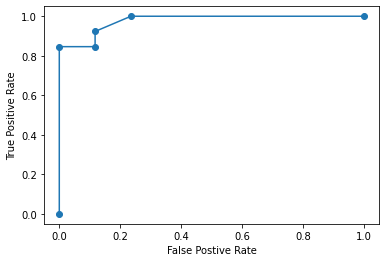

In [0]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,'o-')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [0]:
from sklearn.metrics import roc_curve,roc_auc_score

from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression()

clf.fit(X_train,y_train)

# predict probabilities
y_probs = clf.predict_proba(X_test)

# keep probabilities for the positive outcome only
y_probs = y_probs[:, 1]

auc_score = roc_auc_score(y_test, y_probs)
print("AUC = ", auc_score)

fpr, tpr, threshold = roc_curve(y_test,y_probs)

AUC =  0.9683257918552035


Text(0, 0.5, 'True Positive Rate')

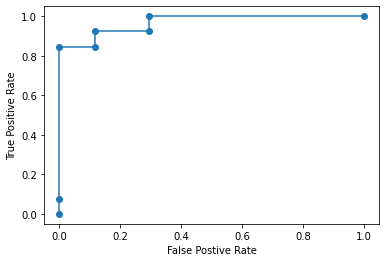

In [0]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr,'o-')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')

In [0]:
y_probs

array([0.27977761, 0.81746024, 0.4156452 , 0.35444432, 0.44331266,
       0.35644514, 0.45421711, 0.50750751, 0.59457427, 0.23830255,
       0.92131454, 0.92460854, 0.64391131, 0.42903715, 0.653557  ,
       0.80785543, 0.89693149, 0.2732169 , 0.21268506, 0.33880666,
       0.10227344, 0.4775712 , 0.83749421, 0.07675485, 0.38048908,
       0.44136609, 0.27426413, 0.89595451, 0.88993453, 0.57467787])

In [0]:
[int(p>0.5) for p in y_probs]

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1]

In [0]:
from sklearn.metrics import recall_score, precision_score, f1_score
for thr in [0.1, 0.5, 0.9]:
    y_pred = [int(p>thr) for p in y_probs]
    print(recall_score(y_test, y_pred), 
          precision_score(y_test, y_pred), 
          f1_score(y_test, y_pred))

1.0 0.4482758620689655 0.6190476190476191
0.8461538461538461 0.8461538461538461 0.8461538461538461
0.15384615384615385 1.0 0.2666666666666667


# Topic 3 Regression

## Load the Data

In [0]:
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"                     
# dataset_path = 'data/BostonHousing.csv'
X = pd.read_csv(dataset_path)
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Prepare the Data

In [0]:
# Define input and output
y = X.pop('medv')

In [0]:
# Split and Randomize the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=100)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# X_train

## Define the Model

In [0]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

### Train the Model

In [0]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluate the Model

In [0]:
lm.score(X_test, y_test) #R2

0.705791987326454

In [0]:
y_pred = lm.predict(X_test)

In [0]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [0]:
mean_absolute_error(y_test,y_pred)

3.4719478482701605

In [0]:
mean_squared_error(y_test,y_pred) **0.5 #RMSE is most recommended

5.458831770761838

In [0]:
r2_score(y_test,y_pred)

0.705791987326454

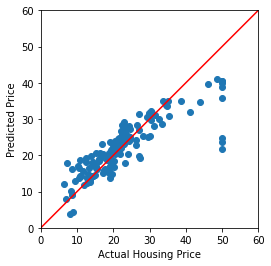

In [0]:
import matplotlib.pyplot as plt 

y_pred = lm.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Housing Price')
plt.ylabel('Predicted Price')
plt.axis('equal')
plt.axis('square')
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.plot([0, 100], [0, 100],'r')  #plot a line from (0,0) to (100,100)

## Regularizations

### Ridge Regularization

In [0]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)
y_pred = rr.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred) ** 0.5

5.460242600398875

### Lasso Regularizaton

In [0]:
from sklearn.linear_model import Lasso
lr = Lasso(alpha=0.01) 
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)**0.5

5.460242600398875

### Elastic Net Regularization

In [0]:
from sklearn.linear_model import ElasticNet
er = ElasticNet(alpha=0.01, l1_ratio=0.01)
er.fit(X_train,y_train)
y_pred = er.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)**0.5

5.946377289552112

## Decision Tree (Optional)

In [0]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)**0.5

5.120116415206119

In [0]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_train, y_train), dt.score(X_test, y_test)

(1.0, 0.7065080711169298)

In [0]:
# Underfitting
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(X_train,y_train)
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.8397334748609094, 0.6825721308690926)

In [0]:
# Just Nice
dt = DecisionTreeRegressor(max_depth = 9)
dt.fit(X_train,y_train)
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.9851246859179696, 0.7517116080421036)

## Ex: Linear Regression

In [0]:
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv"
# dataset_path = "data/iris.csv"
                     
X = pd.read_csv(dataset_path)
X

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [0]:
X.pop('Name')
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [0]:
y = X.pop('SepalWidth')

In [0]:
# Split and Randomize the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lm.predict(X_test)
mean_squared_error(y_test,y_pred), r2_score(y_test,y_pred)

(0.10980387289057184, 0.49540951617254136)

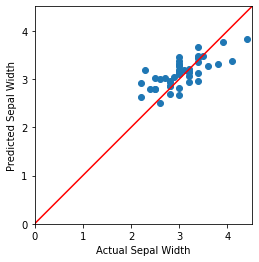

In [0]:
import matplotlib.pyplot as plt 

y_pred = lm.predict(X_test)

plt.scatter(y_test,y_pred)
plt.xlabel('Actual Sepal Width')
plt.ylabel('Predicted Sepal Width')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])
plt.plot([0, 100], [0, 100],'r')

# Topic 4 Clustering

## K-Means

### Load the Data

In [0]:
# Load Iris dataset
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv"
# dataset_path = "data/iris.csv"
                     
X = pd.read_csv(dataset_path)
y = X.pop('Name') # not for purpose of training

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

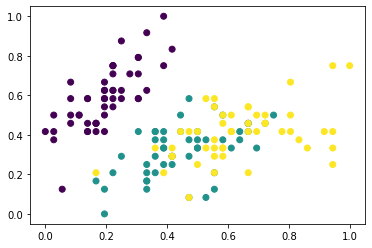

In [97]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

### load the Model

In [0]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3, random_state=100)

### Train the Model

In [99]:
cluster.fit(X) #unlabeled data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [100]:
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [101]:
cluster.cluster_centers_

array([[0.19611111, 0.59083333, 0.07864407, 0.06      ],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033]])

### Evaluate the Model

#### External Analysis

Text(0.5, 1.0, 'Prediction')

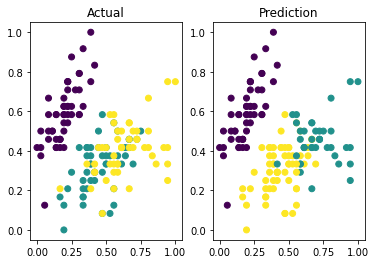

In [102]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title("Actual")
plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],c=cluster.labels_)
plt.title("Prediction")

#### Internal Analysis - Silhouette Analysis

In [103]:
from sklearn.metrics import silhouette_score
silhouette_score(X, cluster.labels_)

0.5043188549150884

### Find best k

In [104]:
for i in range(2,5):
    cluster = KMeans(n_clusters=i,random_state=10)
    cluster.fit(X)
    s = silhouette_score(X, cluster.labels_)
    print('Cluster: ',i, 'Silhouette Score :',s)

Cluster:  2 Silhouette Score : 0.6294675561906644
Cluster:  3 Silhouette Score : 0.5043188549150884
Cluster:  4 Silhouette Score : 0.4446273300650682


## Hierarchical Agglormerative Clustering

In [105]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3)
cluster.fit(X)
silhouette_score(X, cluster.labels_)

0.5043490792923953

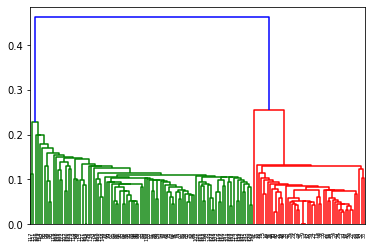

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X)
d = dendrogram(Z)

In [0]:
for i in range(2,5):
    cluster = AgglomerativeClustering(n_clusters = i)
    cluster.fit(X)
    s = silhouette_score(X, cluster.labels_)
    print('Cluster: ',i, 'Silhouette Score :',s )

Cluster:  2 Silhouette Score : 0.6294675561906644
Cluster:  3 Silhouette Score : 0.5043490792923953
Cluster:  4 Silhouette Score : 0.43255652632301644


In [0]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2)
cluster.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

Text(0.5, 1.0, 'Prediction')

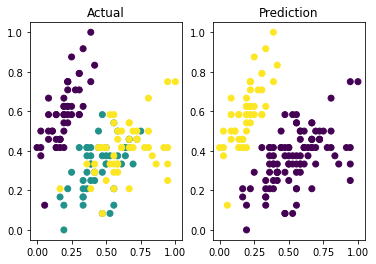

In [0]:
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title("Actual")
plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],c=cluster.labels_)
plt.title("Prediction")

## Case Study: Customer Segmentation (Optional)

In [0]:
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/anqitu/SklearnTraining/master/exercises/data/mall_customers.csv"
# dataset_path = 'mall_customers.csv'
customers = pd.read_csv(dataset_path)

In [0]:
customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
customers.shape

(200, 5)

In [0]:
X=customers[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [0]:
# Finding the optimal number of cluster using Silhouette Score method
from sklearn.metrics import silhouette_score
scores = []
for n_clusters in range(2, 10):
    clusterer = KMeans(n_clusters=n_clusters, random_state = 2020)
    clusterer.fit(X)
    scores.append(silhouette_score(X, clusterer.labels_))

Text(0, 0.5, 'Mean Silhouette Coefficient of Samples')

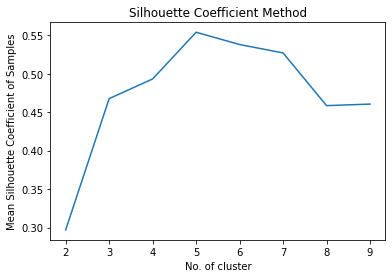

In [0]:
import matplotlib.pyplot as plt
plt.plot(range(2,10),scores)
plt.title('Silhouette Coefficient Method')
plt.xlabel('No. of cluster')
plt.ylabel('Mean Silhouette Coefficient of Samples')

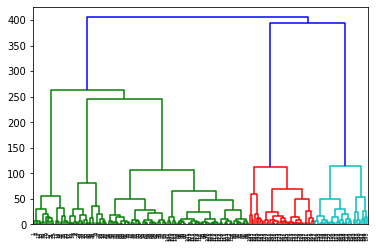

In [0]:
# Finding optimal number of cluster using dendrogram 
# From the below graph we can see that optimal number of custer will be 5.
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(X, method='ward')) #"ward" is most recommended for calculating distance

In [0]:
# Finding the optimal number of cluster using Elbow method
# Minimize within-cluster sums of squares (wcss)
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss: sum of squared dist. of sample to their closest cluster center')

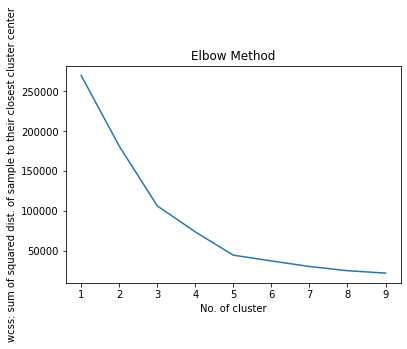

In [0]:
import matplotlib.pyplot as plt
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of squared dist. of sample to their closest cluster center')

## Kmeans with cluster 5

In [0]:
cluster=KMeans(n_clusters = 5, random_state = 2020)
cluster.fit(X)
labels = cluster.labels_
centroids = cluster.cluster_centers_

In [0]:
centroids

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [0]:
X['label'] = labels
X.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Annual Income (k$),Spending Score (1-100),label
0,15,39,3
1,15,81,2
2,16,6,3
3,16,77,2
4,17,40,3


## Visualization

In [0]:
label_color_map = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'cyan',
    4: 'magenta'
}

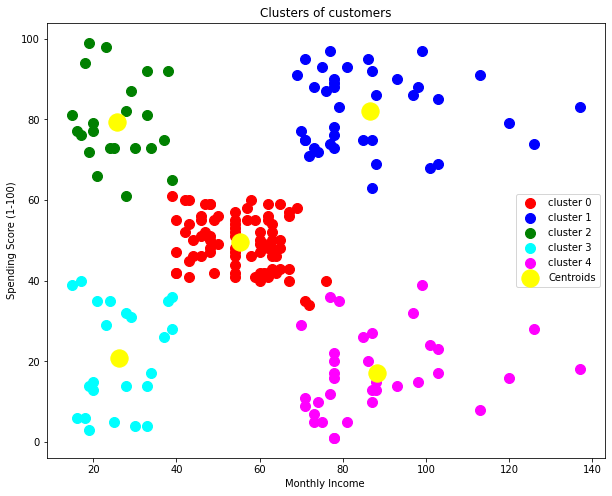

In [0]:
# Visualising the clusters
plt.figure(figsize=(10,8))
for label, color in label_color_map.items():
    plt.scatter(X[X['label'] == label]['Annual Income (k$)'], X[X['label'] == label]['Spending Score (1-100)'], 
                s = 100, c = color, label ='cluster {}'.format(label) )
plt.scatter(centroids[:,0],centroids[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Monthly Income ')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Divide the customer into 5 segment:

1. Careful
2. Standard
3. Target
4. Sensible
5. Careless

## Visualising the clusters
- **Target group**: cluster with high Monthly income and high Spending score
- **Careful group**: cluster with high income but low spending score
- **Careless group**: cluster with low income and high spending score
- **Sensible group**: Cluster with low income and low spending score
- **Standard group**: The one that is in the middle

## How this will help?
For new promotional offer, instead of calling each customer, first we will focus on "Target" group of customer.

Different type of promotional offer will we suited for different group of customer:-
For example a sense of compitition to win a prize will be suited for one type of cluster while, buy one and get one free will be suited for another group of customer.

Based on each cluster of customer we can choose different strategy of promotion.

# Topic 5 Dimension Reduction

## PCA on Iris Dataset

In [0]:
# Load Iris dataset
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv"
# dataset_path = "data/iris.csv"         
X = pd.read_csv(dataset_path)

In [0]:
y = X.pop('Name')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [0]:
X_t= pca.fit_transform(X)
# X_t

In [80]:
pca.explained_variance_

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [81]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

In [82]:
pca.explained_variance_ratio_.cumsum()

array([0.92461621, 0.97763178, 0.99481691, 1.        ])

In [86]:
from sklearn.externals import joblib
joblib.dump(pca, 'pca.pkl')   

['pca.pkl']

In [87]:
pca1 = joblib.load('pca.pkl')
pca1

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [88]:
pca1.n_components_

2

In [89]:
X_new = [[1,4,5,2]]
pca1.transform(X_new)

array([[-0.4782806 , -2.76758432]])

## Exercise: PCA on K-Means Clustering

In [0]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=3)
cluster.fit(X)

cluster2 = KMeans(n_clusters=3)
cluster2.fit(X_t)

In [0]:
import matplotlib.pyplot as plt

plt.subplot(2,2,1)
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y)
plt.title("Actual")
plt.subplot(2,2,2)
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=cluster.labels_)
plt.title("Prediction")

plt.subplot(2,2,3)
plt.scatter(X_t[:,0],X_t[:,1],c=y)
plt.title('PCA')
plt.subplot(2,2,4)
plt.scatter(X_t[:,0],X_t[:,1],c=cluster2.labels_)
plt.title('PCA Prediction')

# Model Selection (Optional)

In [0]:
# Load Iris dataset
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv"
# dataset_path = 'data/iris.csv'
                     
X = pd.read_csv(dataset_path)

y = X.pop('Name')

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                 random_state=100)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters = {'min_samples_split':[5, 10, 15], 
              'max_depth': range(6, 11, 2)}
gridsearcher = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 33), 
                            param_grid = parameters, cv=5)
gridsearcher.fit(X_train,y_train)

In [94]:
gridsearcher.best_params_

{'max_depth': 6, 'min_samples_split': 5}

In [0]:
tree_clf = gridsearcher.best_estimator_

In [0]:
tree_clf.predict(X_test)

## Case Study on Titanic (Optional)

In [0]:
path = 'https://raw.githubusercontent.com/anqitu/SckitLearnTraining/master/exercises/data/titanic.csv'
# path = 'data/titanic.csv'
df = pd.read_csv(path)

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Christy, Miss. Julie Rachel",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [0]:
pid = df.pop('PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
name = df.pop('Name')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
name = df.pop('Ticket')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [0]:
df['Pclass'].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [0]:
df['Cabin'].value_counts(dropna=False)

NaN            687
B96 B98          4
C23 C25 C27      4
G6               4
C22 C26          3
              ... 
A24              1
F G63            1
C54              1
A14              1
A5               1
Name: Cabin, Length: 148, dtype: int64

In [0]:
name = df.pop('Cabin')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


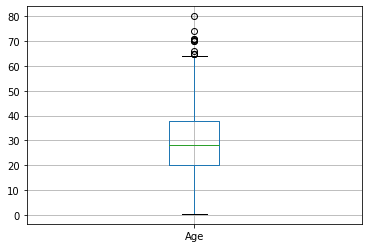

In [0]:
df.boxplot('Age')

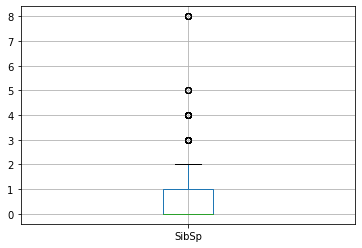

In [0]:
df.boxplot('SibSp')

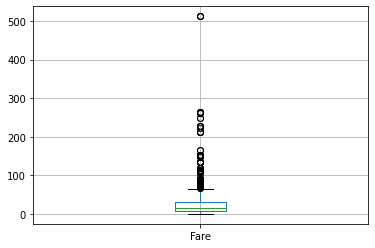

In [0]:
df.boxplot('Fare')

In [0]:
df['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [0]:
# Method 1
embarked_mode = df['Embarked'].mode().iloc[0]
df['Embarked'] = df['Embarked'].fillna(embarked_mode)

In [0]:
df['Embarked'] = le.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [0]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [0]:
from sklearn.impute import SimpleImputer
import numpy as np
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df['Age'] = imp.fit_transform(df[['Age']])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [0]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [0]:
fare_outlier = df['Fare'].max()

In [0]:
df[df['Fare'] == fare_outlier]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,0,35.0,0,0,512.3292,0
679,1,1,1,36.0,0,1,512.3292,0
737,1,1,1,35.0,0,0,512.3292,0


In [0]:
# Drop outliers
df[df['Fare'] != fare_outlier]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [0]:
# Replace with Mean
df['Fare'] = df['Fare'].replace(fare_outlier, df['Fare'].mean())

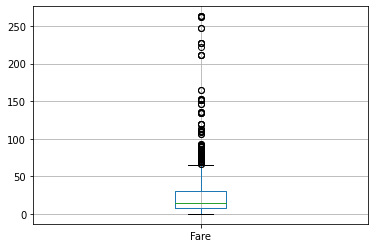

In [0]:
df.boxplot('Fare')

In [0]:
y = df.pop('Survived')

In [0]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [0]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(df)

In [0]:
df['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [0]:
df[['Embarked']]

,Embarked
0,2
1,0
2,2
3,2
4,2
...,...
886,2
887,2
888,2
889,0


In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit_transform(df[['Embarked']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [0]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [0]:
X = pd.get_dummies(df, columns = ['Embarked'])

In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_0  891 non-null    uint8  
 7   Embarked_1  891 non-null    uint8  
 8   Embarked_2  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [0]:
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
clf.score(X, y)

0.9820426487093153